## States-TPPI Acquisition

In [197]:
import numpy as np                       # import a library called numpy - we reference it as 'np'
byte_order = 0                           # this means integers are encoded as big endian in our example. 
file = 'trHSQC-States-TPPI/ser'          # location of the Bruker serial file, 'ser'
with open(file, 'rb') as serial_file:    # method of opening the file. We now reference it as 'serial_file'
    if byte_order == 0:                  # byte order refers to big or little endian - a way 32 bit integers
                                         # are encoded. Don't worry. In this example, byte_order is 1.
                                         # we'll show you later how this is detected.
        raw_data = np.frombuffer(        # we read the file data into an 'np' vector called 'raw_data'
            serial_file.read(),          # this is the command to read it
            dtype='<i4'                  # this says 'read it as type big endian'
        )                                # close off the reading function
    elif byte_order == 1:                # or if the byte order is 1 - which it is for this example
                                         # lets read it as little endian
        raw_data = np.frombuffer(        # read into raw data
            serial_file.read(),          # the serial file
            dtype='>i4'                  # with little endian encoding
        )                                # and close off the reading function


In [198]:
fid = raw_data[0:2048]
reals = fid[0::2]
imags = fid[1::2]

fid = reals + 1.j*imags

In [199]:
def remove_bruker_filter(data, grpdly):

    n = float(len(data))
    data = np.fft.fft(np.fft.ifftshift(data)) / n
    data = data * np.exp(2.j * np.pi * grpdly * np.arange(n) / n)
    data = np.fft.fftshift(np.fft.ifft(data)) * n
    skip = int(np.floor(grpdly + 2))    
    add = int(max(skip - 6, 0))           
    data[..., :add] = data[..., :add] + data[..., :-(add + 1):-1]
    data = data[..., :-skip]

    return data


In [200]:
grpdly = 67.9867858886719
fid_adjusted = remove_bruker_filter(fid, grpdly)    # do the filter removal

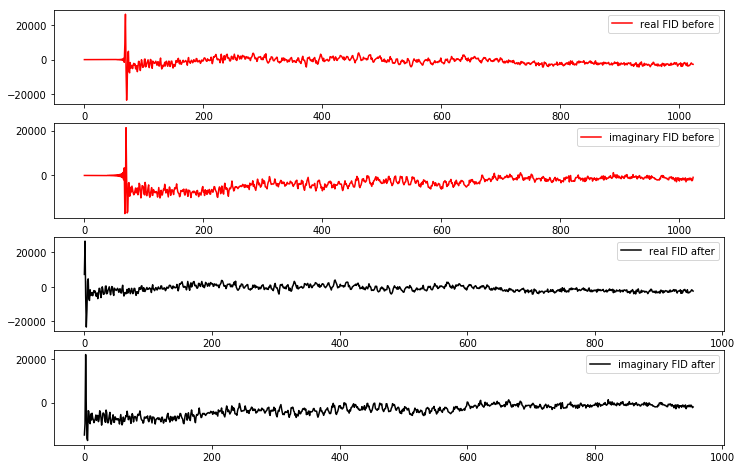

In [201]:
plt.figure(figsize=(12,8))                   # make a figure. Size it 12 x 8. 
plt.subplot(4, 1, 1)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.real(fid),                       # plot the real part of fid before. 
         c='r',                              # Colour it red ('r')
         label='real FID before'             # Label is 'FID Before'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 2)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.imag(fid),                       # plot the real part of fid before. 
         c='r',                              # Colour it red ('r')
         label='imaginary FID before'        # Label is 'FID Before'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 3)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.real(fid_adjusted),              # plot the real part of fid after adjustment. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='real FID after'              # Label is 'FID after'
        )
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 4)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.imag(fid_adjusted),              # plot the real part of fid after adjustment. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary FID after'         # Label is 'FID after'
        )
plt.legend()                                 # plot the legend (the label)


plt.show()                                   # show it!

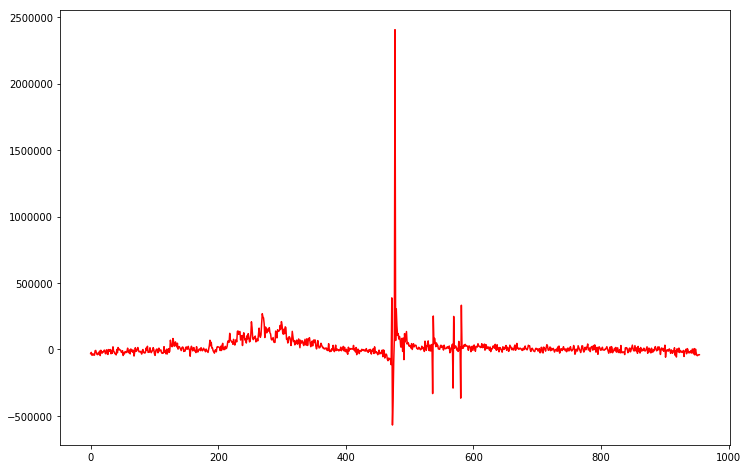

In [213]:
phase_angle = 63.6                                    # phase angle. We know this by testing numbers
                                                      # until the FT has mostly positive peaks in it
    
phase = np.exp(1.j * (phase_angle / 360) * 2* np.pi)  # this creates the complex rotation required

plt.figure(figsize=(12,8))                            # make a figure. Size it 12 x 8. 

plt.plot(                                             # plot
    np.real(                                          # plot only the real part
        np.fft.fftshift(                              # numpy fft method called fftshift
                                                      # shifts the zero frequency to center of spectrum
            np.fft.fft(                               # numpy fft method called fft (np.fft.fft) applied to...
                fid_0*phase                           # fid with bruker filter removed and complex rotated
            )
        )
    )[::-1],                                          # plot things backwards - this is NMR's way
    c = 'r',                                          # colour the plot red
)              
plt.show()                                            # show it

In [202]:
fid_0 = raw_data[0:2048]
reals = fid_0[0::2]
imags = fid_0[1::2]

fid_0 = reals + 1.j*imags

fid_1 = raw_data[2048:4096]
reals = fid_1[0::2]
imags = fid_1[1::2]

fid_1 = reals + 1.j*imags

fid_0 = remove_bruker_filter(fid_0, grpdly)
fid_1 = remove_bruker_filter(fid_1, grpdly)

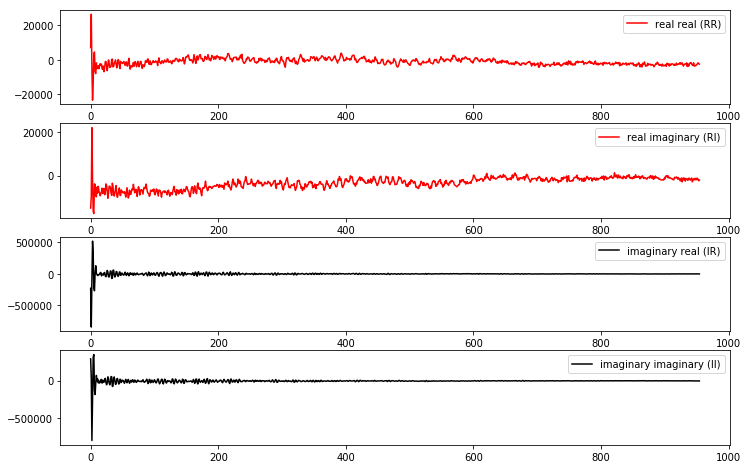

In [203]:
plt.figure(figsize=(12,8))                   # make a figure. Size it 12 x 8. 
plt.subplot(4, 1, 1)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.real(fid_0),                     # plot the real part of fid. 
         c='r',                              # Colour it red ('r')
         label='real real (RR)'              # Label is 'real'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 2)
plt.plot(np.imag(fid_0),                     # plot the real part of fid. 
         c='r',                              # Colour it red ('r')
         label='real imaginary (RI)'         # Label is 'real'
        )  
plt.legend()    

plt.subplot(4, 1, 3)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.real(fid_1),                     # plot the imaginary part of fid. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary real (IR)'         # Label is 'imaginary'
        )
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 4)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.imag(fid_1),                     # plot the imaginary part of fid. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary imaginary (II)'    # Label is 'imaginary'
        )
plt.legend()                                 # plot the legend (the label)

plt.show()                                   # show it!

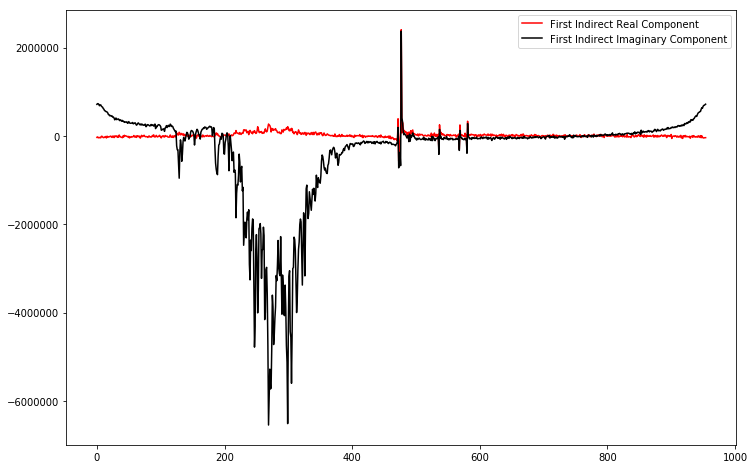

In [211]:
phase_angle = 63.6
phase = np.exp(1.j * (phase_angle / 360) * 2* np.pi)  # create the complex rotation required

plt.figure(figsize=(12,8))                            # make a figure. Size it 12 x 8. 

plt.plot(                                             # plot
    np.real(                                          # plot only the real part
        np.fft.fftshift(                              # numpy fft method called fftshift
            np.fft.fft(                               # numpy fft method called fft (np.fft.fft) applied to...
                fid_0*phase                           # fid with bruker filter removed and complex rotated
            )
        )
    )[::-1],
    c = 'r',
    label = 'First Indirect Real Component'
)              

plt.plot(                                             # plot... on top of the above plot
    np.real(                                          # plot only the real part
        np.fft.fftshift(                              # numpy fft method called fftshift
            np.fft.fft(                               # numpy fft method called fft (np.fft.fft) applied to...
                fid_1*phase                           # fid with bruker filter removed and complex rotated
            )
        )
    )[::-1],
    c = 'k',
    label = 'First Indirect Imaginary Component'
)              

plt.legend()
plt.show()                                            # show the plot

## Now for Echo-Antiecho Acquisition

In [218]:
import numpy as np                       # import a library called numpy - we reference it as 'np'
byte_order = 0                           # this means integers are encoded as big endian in our example. 
file = 'trHSQC-EA/ser'                   # location of the Bruker serial file, 'ser'
with open(file, 'rb') as serial_file:    # method of opening the file. We now reference it as 'serial_file'
    if byte_order == 0:                  # byte order refers to big or little endian - a way 32 bit integers
                                         # are encoded. Don't worry. In this example, byte_order is 0.
                                         # we'll show you later how this is detected.
        raw_data = np.frombuffer(        # we read the file data into an 'np' vector called 'raw_data'
            serial_file.read(),          # this is the command to read it
            dtype='<i4'                  # this says 'read it as type big endian'
        )                                # close off the reading function
    elif byte_order == 1:                # or if the byte order is 1 - which it is not for this example
                                         # lets read it as little endian
        raw_data = np.frombuffer(        # read into raw data
            serial_file.read(),          # the serial file
            dtype='>i4'                  # with little endian encoding
        )                                # and close off the reading function


In [219]:
# dealing with Echo-Antiecho acquisition
fidE = raw_data[0:2048]
reals = fidE[0::2]
imags = fidE[1::2]

fidE = reals + 1.j*imags

fidA = raw_data[2048:4096]
reals = fidA[0::2]
imags = fidA[1::2]

fidA = reals + 1.j*imags

fid_0 = fidE + fidA
fid_1 = fidE - fidA

fid_0 = fid_0 * np.exp(1.j * (90 / 360) * 2 * np.pi)
fid_1 = fid_1 * np.exp(1.j * (180 / 360) * 2 * np.pi)

grpdly = 67.9867858886719
fid_0 = remove_bruker_filter(fid_0, grpdly)    # do the filter removal
fid_1 = remove_bruker_filter(fid_1, grpdly)    # do the filter removal


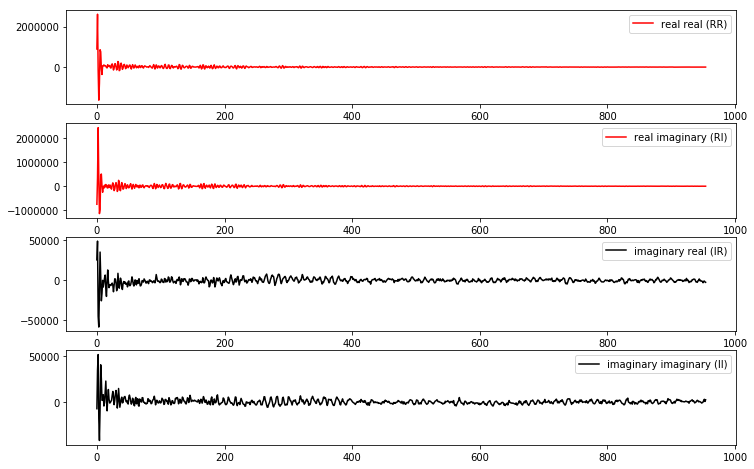

In [220]:
plt.figure(figsize=(12,8))                   # make a figure. Size it 12 x 8. 
plt.subplot(4, 1, 1)                         # create subplot (2x1) and this is the first (1)
plt.plot(np.real(fid_0),                     # plot the real part of fid. 
         c='r',                              # Colour it red ('r')
         label='real real (RR)'              # Label is 'real'
        )  
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 2)
plt.plot(np.imag(fid_0),                     # plot the real part of fid. 
         c='r',                              # Colour it red ('r')
         label='real imaginary (RI)'         # Label is 'real'
        )  
plt.legend()    

plt.subplot(4, 1, 3)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.real(fid_1),                     # plot the imaginary part of fid. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary real (IR)'         # Label is 'imaginary'
        )
plt.legend()                                 # plot the legend (the label)

plt.subplot(4, 1, 4)                         # new subplot, same (2x1) format. This is the second one (2)
plt.plot(np.imag(fid_1),                     # plot the imaginary part of fid. 
         c='k',                              # color it black (k = black. It means 'key' )
         label='imaginary imaginary (II)'    # Label is 'imaginary'
        )
plt.legend()                                 # plot the legend (the label)

plt.show()                                   # show it!

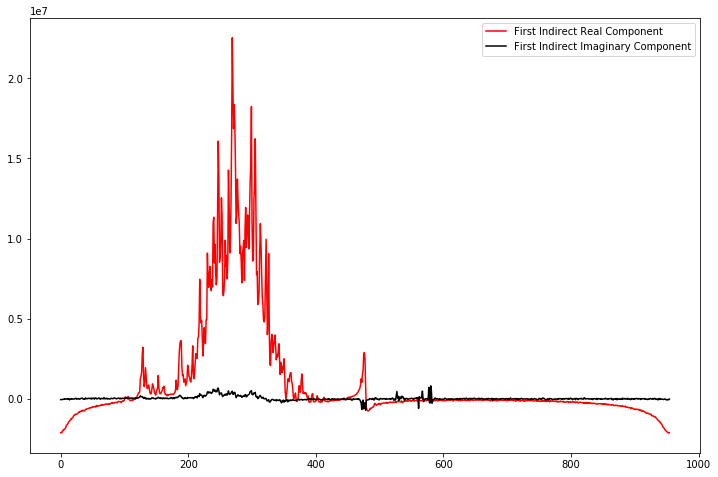

In [221]:
phase_angle = 63.6
phase = np.exp(1.j * (phase_angle / 360) * 2* np.pi)  # create the complex rotation required

plt.figure(figsize=(12,8))                            # make a figure. Size it 12 x 8. 

plt.plot(                                             # plot
    np.real(
        np.fft.fftshift(                              # fftshift to shift zero frequency to center
            np.fft.fft(                               # numpy fft method called fft (np.fft.fft) applied to...
                fid_0*phase                           # fid with bruker filter removed and complex rotated
            )
        )
    )[::-1],
    c = 'r',
    label = 'First Indirect Real Component'
)              

plt.plot(                                             # plot
    np.real(                                          # plot only the real part
        np.fft.fftshift(                              # fftshift to shift zero frequency to center
            np.fft.fft(                               # numpy fft method called fft (np.fft.fft) applied to...
                fid_1*phase                           # fid with bruker filter removed and complex rotated
            )
        )
    )[::-1],
    c = 'k',
    label = 'First Indirect Imaginary Component'
)              

plt.legend()
plt.show()                            # show the plot